# Capstone Project
## Udacity Machine Learning Engineer Nanodegree
### Greg Hacobian -- August 2016

<h1 align="center">Definition</h1> 

## Project Overview

Deep learning is the new big trend in machine learning. It had many recent successes in computer vision, automatic speech recognition and natural language processing. Deep Learning is increasingly being used to deliver near-human level accuracy in image classification, voice recognition, natural language processing, and more. 

Deep Learning attempts to use large volumes of unstructured data, such as images and audio clips, to learn hierarchical models which capture the complex structure in the data and then use these models to predict properties of previously unseen data. For example, DL has proven extremely successful at learning hierarchical models of the visual features and concepts represented in handheld camera images and then using those models to automatically label previously unseen images with the objects present in them.

Humans are very good at recognizing visual patterns--including the faces of people you know--while it's maddeningly complex for a computer to "understand" something visually, dot-by-dot. We will build a Cat/Dog image classifier using a deep learning algorithm called convolutional neural network (CNN) inspired from [Kaggle competition](https://www.kaggle.com/c/dogs-vs-cats). 

![](caffe_classification.png)

## Problem Statement

Our goal is to build a machine learning algorithm capable of detecting the correct animal (cat or dog) in new unseen images.

The objectives of this project are to complete the following tasks with Deep Learning:

1. Build and train a convolutional neural network (CNN) using Caffe for classifying images. Here is an intuitive explanation of the [CNN](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/).
2. Evaluate the classification performance of a trained CNN under different training parameter configurations.
3. Modify the network configuration to improve classification performance.
3. Visualize the features that a trained network has learned.

The intended solution for this problem is to classify new unseen images with highest possible accuracy using a convolutional neural network completely trained in the project from scratch.

## Metrics

In deep learning, the final layer of a neural network used for classification can often be interpreted as a logistic regression. In this context, one can see a deep learning algorithm as multiple feature learning stages, which then pass their features into a logistic regression that classifies an input.

![](CNN1.png)

The neural network learns by generating an error signal that measures the difference between the predictions of the network and the desired values and then using this error signal to change the weights (or parameters) so that predictions get more accurate.
If the guess is wrong then a small modification is made to the weights so that the network will guess more accurately for that image next time it sees it. 

This process is repeated many thousands of times until the network converges to a stable average classification accuracy across all the training images.

<h1 align="center">Analysis</h1> 

## Data Exploration

For this project, a subset of the [ImageNet](http://www.image-net.org/) dataset has been used. ImageNet, a largescale
ontology of images built upon the backbone of the WordNet structure. ImageNet aims to populate the majority of the 80,000 synsets of WordNet with an average of 500-1000 clean and full resolution images. This will result in tens of millions of annotated images organized by the semantic hierarchy of WordNet. 

The images used in this  project are from two different categories, cats and dogs, downloaded from Imagenet. The training data and validation data are downloaded from ImageNet and saved as `jpg` files, and they are stored on the disk drive like:  

* /home/ubuntu/Data/dog_cat_32/train
* /home/ubuntu/Data/dog_cat_32/test
* /home/ubuntu/Data/dog_cat_32/val

To minimize the training time, all of the images have been resized to 32x32 pixels. The training and validation input are described in `train.txt` and `val.txt` as text listing all the files and their labels. These files simply list the relative filename of each image tab separated from a natural number representing the class the image belongs to.  For example, `train.txt` contains the following rows:


## Exploratory Visualization

Below are sample images from both categories.  The cats category includes domestic cats as well as large breeds like lions and tigers.  The dog category is comprised of domestic dogs including pugs, basenji and great pyrenees.  There are approximately 13,000 images in total.


![](src/dogs_cats.png) 


## Algorithms and Techniques

We will use Python and a popular open source deep learning framework called [Caffe](http://caffe.berkeleyvision.org/) to build the image classifier. 

[Caffe](http://caffe.berkeleyvision.org/) is a deep learning framework developed by the Berkeley Vision and Learning Center (BVLC). It is written in C++ and has Python and Matlab bindings.

* Caffe is fast due to it's highly optimized C/CUDA backend which integrates GPU acceleration
* Caffe is still very accessible due to command line, Python and Matlab interfaces
* The wrapper interfaces make it very easy to integrate DNN training and deployment into larger data analytics workflows
* Caffe has a large open-source development community adding new features all time
* Caffe has an associated model-zoo where researchers can upload trained models for others to fine tune or use for inference using their own data

There are 4 steps in training a CNN using Caffe:

* Step 1 - Data preparation: In this step, we clean the images and store them in a format that can be used by Caffe. We use tools that comes with Caffe to  move the training and validation images into **lmdb databases**. One for train (train.lmdb) and one for validation (val.lmdb)
* Step 2 - Model definition: In this step, we choose a CNN architecture and we define its parameters in a configuration file with extension **.prototxt**.
* Step 3 - Solver definition: The solver is responsible for model optimization. We define the solver parameters in a configuration file with extension .prototxt.
* Step 4 - Model training: We train the model by executing one Caffe command from the terminal. After training the model, we will get the trained model in a file with extension **.caffemodel**.

After the training phase, we will use the .caffemodel trained model to make predictions of new unseen data. We will write Python script to do this.

## Machine Setup

Images, videos, and other graphics are represented as matrices. GPUs, compared to CPUs, are faster at performing matrix operations and other advanced mathematical transformations. More detailed information regarding Hardware performance configurations can be found [here](http://caffe.berkeleyvision.org/performance_hardware.html)

For this project, [AWS](https://aws.amazon.com/) EC2 instance of type g2.2xlarge is used. This instance has a high-performance NVIDIA GPU with 1,536 CUDA cores and 4GB of video memory, 15GB of RAM and 8 vCPUs. The machine costs $0.65/hour.

You can skip the hassle of setting up deep learning frameworks from scratch by choosing an Amazon Machine Image (AMI) that comes pre-installed with the libraries and their dependencies. The Stanford class, [CS231n: Convolutional Neural Networksfor Visual Recognition](http://cs231n.stanford.edu/), has provided a public AMI with these specs:

For step by step instruction on how to setup a AWS server with Jupyter, please follow this tutorial [Start deep learning with Jupyter notebooks in the cloud.](http://efavdb.com/deep-learning-with-jupyter-on-aws/)

Let's execute the cell below to display information about the GPUs running on the server.

!nvidia-smi

## Benchmark

A similar problem was defined at [Kaggle dogs-vs-cats](https://www.kaggle.com/c/dogs-vs-cats) competition in 2014 where contestant were asked to write an algorithm to classify whether images contain either a dog or a cat. A Deep learning expert wins Kaggle Dogs vs Cats image competition with an almost perfect result of %99. 

Although the data set used in this project is from ImageNet and not from Kaggle, I use Kaggle dags vs cats competition accuracy scores as a benchmark to evaluate the performance of the models presented in the project.



<h1 align="center">Methodology</h1> 

## Data Preprocessing

Before we train a neural network using Caffe we will move the training and validation images into a database.  The database allows Caffe to efficiently iterate over the image data during training.  The training and validation datasets are independent subsets of the original image dataset.  We will train the network using the training dataset and then test the networks performance using the validation dataset; that way we can be sure that the network performs well for images that it has never been trained on.

mages, videos, and other graphics are represented as matrices, and when you perform a certain operation, such as a camera rotation or a zoom in effect, all you are doing is applying some mathematical transformation to a matrix.

We complete each of these tasks using command line tools that come with Caffe.  A number of useful utilities for data pre-processing, network training and network deployment can be found in the Caffe installation folder in `$CAFFE_ROOT/build/tools`

**(_Note_: you can ignore the "Failed to initialize libdc1394" warning messages in the output). libdc1394 is a library for controlling camera hardware.**


In [4]:
%%bash

#Delet database files if they are already exist.
rm -rf train_lmdb val_lmdb

#Setup environment variables
TOOLS=/home/ubuntu/caffe/build/tools
TRAIN_DATA_ROOT=/home/ubuntu/Data/dog_cat_32/train/
VAL_DATA_ROOT=/home/ubuntu/Data/dog_cat_32/val/

#Create the training database
$TOOLS/convert_imageset \
--shuffle \
$TRAIN_DATA_ROOT \
$TRAIN_DATA_ROOT/train.txt \
train_lmdb

#Create the validation database
$TOOLS/convert_imageset \
--shuffle \
$VAL_DATA_ROOT \
$VAL_DATA_ROOT/val.txt \
val_lmdb



libdc1394 error: Failed to initialize libdc1394
I0823 16:19:21.094966  1702 convert_imageset.cpp:83] Shuffling data
I0823 16:19:21.474643  1702 convert_imageset.cpp:86] A total of 12904 images.
I0823 16:19:21.475013  1702 db_lmdb.cpp:38] Opened lmdb train_lmdb
I0823 16:19:21.590530  1702 convert_imageset.cpp:144] Processed 1000 files.
I0823 16:19:21.714834  1702 convert_imageset.cpp:144] Processed 2000 files.
I0823 16:19:21.834143  1702 convert_imageset.cpp:144] Processed 3000 files.
I0823 16:19:21.946826  1702 convert_imageset.cpp:144] Processed 4000 files.
I0823 16:19:22.056252  1702 convert_imageset.cpp:144] Processed 5000 files.
I0823 16:19:22.178570  1702 convert_imageset.cpp:144] Processed 6000 files.
I0823 16:19:22.291185  1702 convert_imageset.cpp:144] Processed 7000 files.
I0823 16:19:22.403937  1702 convert_imageset.cpp:144] Processed 8000 files.
I0823 16:19:22.508182  1702 convert_imageset.cpp:144] Processed 9000 files.
I0823 16:19:22.612776  1702 convert_imageset.cpp:144] P

We also create a mean image from the training data. This is the image obtained by taking the mean value of each pixel across all of the training dataset images.  We do this so that we can extract that mean image from each training and validation image before it is fed into the neural network.  This is an important pre-processing and refinement step for achieving fast and effective training.  It has the effect of removing the average brightness (intensity) of each point in the image so that the network learns about image content rather than illumination conditions.

Execute the cell below to create a mean image of the training data. 

In [1]:
%%bash

#Setup environment variables
TOOLS=/home/ubuntu/caffe/build/tools

#Create the mean image database
$TOOLS/compute_image_mean train_lmdb mean.binaryproto

Couldn't find program: u'bash'


Run the cell below to see what the mean image looks like. Strangely, it looks a little like a mouse...

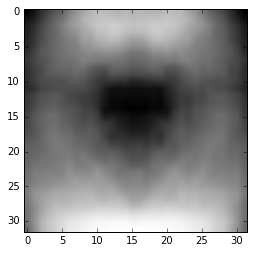

In [6]:
import caffe
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

blob = caffe.proto.caffe_pb2.BlobProto()
data = open('/home/ubuntu/caffe/examples/Dog_Cat_Classification/mean.binaryproto','rb').read()
blob.ParseFromString(data)
arr = np.array(caffe.io.blobproto_to_array(blob))[0,:,:,:].mean(0)
plt.imshow(arr, cmap=cm.Greys_r)
plt.show()

## Implementation

We are now going to configure our network and start training.  For this project we will borrow our network architecture from the cifar10 design that is provided with Caffe.  You can find the original network in `$CAFFE_ROOT/examples/cifar10`. The only modification we will make initially is to change the final output softmax layer, which does the actual classification, to only have two classes for our dogs and cats problem rather than the ten classes needed for the CIFAR data.

Below we see an image of the cifar10 network architecture. As we can see the cifar10 network is a convolutional neural network (CNN) with three convolutional layers (each with pooling, ReLU activation and normalization) followed by a single fully-connected layer performing the final classification.

![](src/cifar.png)

We see that the network input data has dimensions 100x3x32x32. This means that we have batches of 100 training images each with three-channels, i.e. it's color, and 32x32 pixels.

The first convolutional layer applies 32 5x5 filters.  As the filters have size 5x5 we must pad the edges of the input images with zeros to ensure that the output of the layer has the same size.

After the convolutional layer max pooling is applied to reduce the size of the output images by half and a rectified linear unit (ReLU) activation function is applied.

Layers 2 is also a convolutional layer repeating this pattern but using average pooling.  

The final layer is a fully connected layer with two neurons which together with the image labels feeds into a softmax layer which performs the classification and computes the classification loss.  The two final neurons in the output layer correspond to our two classes, dogs and cats.

Caffe encodes deep neural network architectures like this in text files called prototxt files. You can get more information about the types of layers that can be defined in a network prototxt file [here](http://caffe.berkeleyvision.org/tutorial/layers.html).

We now have our datasets and a network configuration we are nearly ready to train the network.  The final thing that Caffe needs before we can train is a specification of the learning algorithm parameters.  This specification is also made in a prototxt file but with a simpler structure. You can get more information about the range of parameters that can be set in a solver prototxt file [here](http://caffe.berkeleyvision.org/tutorial/solver.html).

The network configuration and solver files are located at src directory.

We are now ready to train the network.  Again, this is carried out using a  command line tool that comes with Caffe, this time it is the binary `caffe` itself with the `train` option. Execute the cell below to begin training - it should take just under a minute to train - be sure to scroll down through the complete Caffe output.

In [1]:
%%bash
#Set the location of the caffe tools folder
TOOLS=/home/ubuntu/caffe/build/tools
#Train the network
$TOOLS/caffe train -gpu 0 -solver src/solver.prototxt

libdc1394 error: Failed to initialize libdc1394
I0825 19:34:03.783304  1818 upgrade_proto.cpp:990] Attempting to upgrade input file specified using deprecated 'solver_type' field (enum)': src/solver.prototxt
I0825 19:34:03.784045  1818 upgrade_proto.cpp:997] Successfully upgraded file specified using deprecated 'solver_type' field (enum) to 'type' field (string).
W0825 19:34:03.784055  1818 upgrade_proto.cpp:999] Note that future Caffe releases will only support 'type' field (string) for a solver's type.
I0825 19:34:03.784590  1818 caffe.cpp:185] Using GPUs 0
I0825 19:34:04.924633  1818 solver.cpp:48] Initializing solver from parameters: 
test_iter: 100
test_interval: 250
base_lr: 0.01
display: 20
max_iter: 750
lr_policy: "step"
gamma: 0.1
momentum: 0.9
weight_decay: 0.0005
stepsize: 500
snapshot: 250
snapshot_prefix: "checkpoints/snapshot"
solver_mode: GPU
device_id: 0
random_seed: 1234
net: "src/train_val.prototxt"
type: "SGD"
I0825 19:34:04.925279  1818 solver.cpp:91] Creating train

After 750 training iterations the training accuracy is about %50. Not impressive!

We can achieve much higher accuracy and a lower loss against both the training and validation datasets for this task. Ir seems our network is underfitting the data.


## Refinement

Many network configurations such as Alexnet, GoogLeNet and VGG are significantly larger than the three layer architecture used above and have proven to be very accurate at classifying the ImageNet images.  Now, we are going to increase the complexity of this network to improve the accuracy.

There are many knobs that one can turn in choosing a neural network architecture.  For example, add layers, increased the number of learned weights, change the learning rate or introduce a more complex policy to modify the learning rate as training progresses.  We will experiment with some of these modifications to see the effect on classification accuracy.

We will increase the number of outputs in the convolutional layers to 64 for layer 1 and 128 for layer 2.  Also add a third convolutional layer that is identical to the second one.  Just make sure to have the right layer outputs feeding into this new layer and the final fully-connected layer.


This time it will take about 90 seconds to train due to the increased network size. 

In [2]:
%%bash
TOOLS=/home/ubuntu/caffe/build/tools
#Train your modified network configuration
$TOOLS/caffe train -gpu 0 -solver src/solver2.prototxt

libdc1394 error: Failed to initialize libdc1394
I0825 19:41:30.915251  1840 upgrade_proto.cpp:990] Attempting to upgrade input file specified using deprecated 'solver_type' field (enum)': src/solver2.prototxt
I0825 19:41:30.915506  1840 upgrade_proto.cpp:997] Successfully upgraded file specified using deprecated 'solver_type' field (enum) to 'type' field (string).
W0825 19:41:30.915514  1840 upgrade_proto.cpp:999] Note that future Caffe releases will only support 'type' field (string) for a solver's type.
I0825 19:41:30.915643  1840 caffe.cpp:185] Using GPUs 0
I0825 19:41:31.305042  1840 solver.cpp:48] Initializing solver from parameters: 
test_iter: 100
test_interval: 250
base_lr: 0.01
display: 20
max_iter: 750
lr_policy: "step"
gamma: 0.1
momentum: 0.9
weight_decay: 0.0005
stepsize: 500
snapshot: 250
snapshot_prefix: "checkpoints/snapshot"
solver_mode: GPU
device_id: 0
random_seed: 1234
net: "src/train_val2.prototxt"
type: "SGD"
I0825 19:41:31.305232  1840 solver.cpp:91] Creating tra

We noticed significant performance improvements. The accuracy is now about %70 and we are underfitting less.

Let's make one more modification to the network before training a final time.  In the last modification we increased the number of neurons in our convolutional layers.  Another way to increase the number of trainable parameters in our network is to make it deeper by adding more layers.  This time we add a new fully-connected layer with 500 outputs - call it `ip2`.  This layers should come after the third pooling layer, `pool3`, but **before** the existing fully-connected layer `ip1`.  In Caffe, fully-connected layers are implemented using the inner product layer construct.  After the new fully-connected (inner product) layer you also need a ReLU activation layer and a dropout layer.  The dropout layer will prevent the network from *overfitting*, i.e. getting really good at classifying the training data but not able to classify the validation data.

Here is what `ip2` should look like when inserted after `pool3`. 

REMEMBER: Don't forget to change the input of your existing fully-connected layer `ip1` to be the output of the new layer `ip2`!

Again, this model will take slightly longer to train due to the increased size. It's about 3 minutes and 20 seconds.

In [3]:
%%bash
TOOLS=/home/ubuntu/caffe/build/tools
#Train your modified network configuration
$TOOLS/caffe train -gpu 0 -solver src/solver3.prototxt

libdc1394 error: Failed to initialize libdc1394
I0825 19:45:29.439239  1855 upgrade_proto.cpp:990] Attempting to upgrade input file specified using deprecated 'solver_type' field (enum)': src/solver3.prototxt
I0825 19:45:29.439512  1855 upgrade_proto.cpp:997] Successfully upgraded file specified using deprecated 'solver_type' field (enum) to 'type' field (string).
W0825 19:45:29.439520  1855 upgrade_proto.cpp:999] Note that future Caffe releases will only support 'type' field (string) for a solver's type.
I0825 19:45:29.439653  1855 caffe.cpp:185] Using GPUs 0
I0825 19:45:29.843694  1855 solver.cpp:48] Initializing solver from parameters: 
test_iter: 100
test_interval: 250
base_lr: 0.01
display: 20
max_iter: 750
lr_policy: "step"
gamma: 0.1
momentum: 0.9
stepsize: 500
snapshot: 750
snapshot_prefix: "checkpoints/snapshot"
solver_mode: GPU
device_id: 0
random_seed: 1234
net: "src/train_val3.prototxt"
type: "SGD"
I0825 19:45:29.843866  1855 solver.cpp:91] Creating training net from net fi

The classification accuracy remains as %70.


<h1 align="center">Results</h1> 

## Model Evaluation and Validation

We will now learn how to deploy our final trained network to perform classification of new images. For all of the training above we used the Caffe command line interface tools.  For classification we are going to use Caffe's Python interface.  We will first import the Python libraries we require and create some variables specifying the locations of important files.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

plt.rcParams['figure.figsize'] = (6.0, 4.0)

# Make sure that caffe is on the python path:
#caffe_root = '../'  # this file is expected to be in {caffe_root}/examples
import sys
#sys.path.insert(0, caffe_root + 'python')

import caffe

# Set the right path to your model definition file, pretrained model weights,
# and the image you would like to classify.
MODEL_FILE = '/home/ubuntu/caffe/examples/Dog_Cat_Classification/src/deploy3.prototxt'
PRETRAINED = '/home/ubuntu/caffe/examples/Dog_Cat_Classification/checkpoints/pretrained.caffemodel'
IMAGE_FILE1 = '/home/ubuntu/Data/dog_cat_32/test/cat_236.jpg'
IMAGE_FILE2 = '/home/ubuntu/Data/dog_cat_32/test/dog_4987.jpg'
LABELS_FILE = '/home/ubuntu/Data/dog_cat_32/labels.txt'
labels=open(LABELS_FILE,'r').readlines()

Loading a network is easy. The `caffe.Classifier` method takes care of everything. Note the arguments for configuring input preprocessing: mean subtraction switched on by giving a mean array, input channel swapping takes care of mapping RGB into the reference ImageNet model's BGR order, and raw scaling multiplies the feature scale from the input [0,1] to the ImageNet model's [0,255].

In [5]:
# First we must import the mean.binaryproto mean image into a numpy array
blob = caffe.proto.caffe_pb2.BlobProto()
data = open( 'mean.binaryproto' , 'rb' ).read()
blob.ParseFromString(data)
arr = np.array( caffe.io.blobproto_to_array(blob) )
out = arr[0]

In [6]:
# Load our pretrained model
net = caffe.Classifier(MODEL_FILE, PRETRAINED,
                       mean=out,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(32, 32))
net2 = caffe.Classifier(MODEL_FILE, PRETRAINED,
                       mean=out,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(32, 32))

Let's take a look at our example images with Caffe's image loading helper. We are going to classify 2 different images, one from each category.

(<matplotlib.image.AxesImage at 0x7f3b42da3390>,
 <matplotlib.text.Text at 0x7f3b42ded150>)

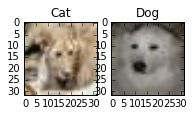

In [7]:
# Load two test images
input_image1 = caffe.io.load_image(IMAGE_FILE1)
input_image2 = caffe.io.load_image(IMAGE_FILE2)
# Display the test images
plt.subplot(1,4,1).imshow(input_image1),plt.title('Cat')
plt.subplot(1,4,2).imshow(input_image2),plt.title('Dog')

Time to classify. The default is to actually do 10 predictions, cropping the center and corners of the image as well as their mirrored versions, and average over the predictions.  This approach typically leads to better classification accuracy as it is more robust to object translation within in the image.

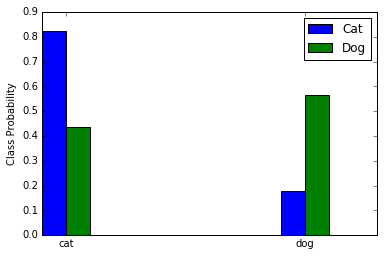

In [8]:
prediction1 = net.predict([input_image1]) 
prediction2 = net2.predict([input_image2])
width=0.1
plt.bar(np.arange(2),prediction1[0],width,color='blue',label='Cat')
plt.bar(np.arange(2)+width,prediction2[0],width,color='green',label='Dog')
plt.xticks(np.arange(2)+width,labels)
plt.ylabel('Class Probability')
plt.legend()


You can see what class the neural network believes each image is. In the cases above the highest probabilities are given to the correct class for both test images. 

## Justification

A text file containing a list of 20 images being stored on this host machine is provided. By executing the cell below you will classify all of these images with the network you trained above and calculate the mean accuracy.

In [ ]:
TEST_FILE=open('/home/ubuntu/Data/dog_cat_32/val/test.txt','r') 
TEST_IMAGES=TEST_FILE.readlines()
PredictScore=np.zeros((len(TEST_IMAGES),1))
for i in range(len(TEST_IMAGES)):
    IMAGE_FILE='/home/ubuntu/Data/dog_cat_32/val/' + TEST_IMAGES[i].split()[0]
    CATEGORY=TEST_IMAGES[i].split()[1]
    #print TEST_IMAGES[i]
    input_test = caffe.io.load_image(IMAGE_FILE)
    prediction = net2.predict([input_test])  
    #print prediction[0]
    if prediction[0].argmax()==int(CATEGORY):
        print 'CORRECT -- predicted class for ', str(IMAGE_FILE[62:]),':', prediction[0].argmax(), 'true class:', CATEGORY
    elif prediction[0].argmax()!=int(CATEGORY):
        print 'WRONG -- predicted class ', str(IMAGE_FILE[62:]),':', prediction[0].argmax(), 'true class:', CATEGORY            
    PredictScore[i]=int(prediction[0].argmax()==int(CATEGORY))
Accuracy=np.sum(PredictScore)/len(PredictScore)
print 'Prediction accuracy with this image set is', np.sum(PredictScore)/len(PredictScore)

## Try your own image
Now we'll grab an image from the web and classify it using the steps above.

* Try setting my_image_url to any JPEG image URL.

In [ ]:
# download an image
my_image_url = "..."  # paste your URL here
# for example:
# my_image_url = "https://upload.wikimedia.org/wikipedia/commons/b/be/Orang_Utan%2C_Semenggok_Forest_Reserve%2C_Sarawak%2C_Borneo%2C_Malaysia.JPG"
!wget -O image.jpg $my_image_url

# transform it and copy it into the net
image = caffe.io.load_image('image.jpg')
net.blobs['data'].data[...] = transformer.preprocess('data', image)

# perform classification
net.forward()

# obtain the output probabilities
output_prob = net.blobs['prob'].data[0]

# sort top five predictions from softmax output
top_inds = output_prob.argsort()[::-1][:5]

plt.imshow(image)

print 'probabilities and labels:'
zip(output_prob[top_inds], labels[top_inds])

<h1 align="center" style="color:blue;">CONCLUSION</h1>

## Free-Form Visualization

This portion of the project follows the filter visualization example provided with Caffe and the DeCAF visualizations originally developed by Yangqing Jia.


In [16]:
#View a list of the network layer outputs and their dimensions
[(k, v.data.shape) for k, v in net.blobs.items()]

[('data', (1, 3, 32, 32)),
 ('conv1', (1, 64, 32, 32)),
 ('pool1', (1, 64, 16, 16)),
 ('norm1', (1, 64, 16, 16)),
 ('conv2', (1, 128, 16, 16)),
 ('pool2', (1, 128, 8, 8)),
 ('norm2', (1, 128, 8, 8)),
 ('conv3', (1, 128, 8, 8)),
 ('pool3', (1, 128, 4, 4)),
 ('ip2', (1, 500)),
 ('ip3', (1, 500)),
 ('ip1', (1, 2)),
 ('prob', (1, 2))]

First you are going to visualize the filters of the first layer. 


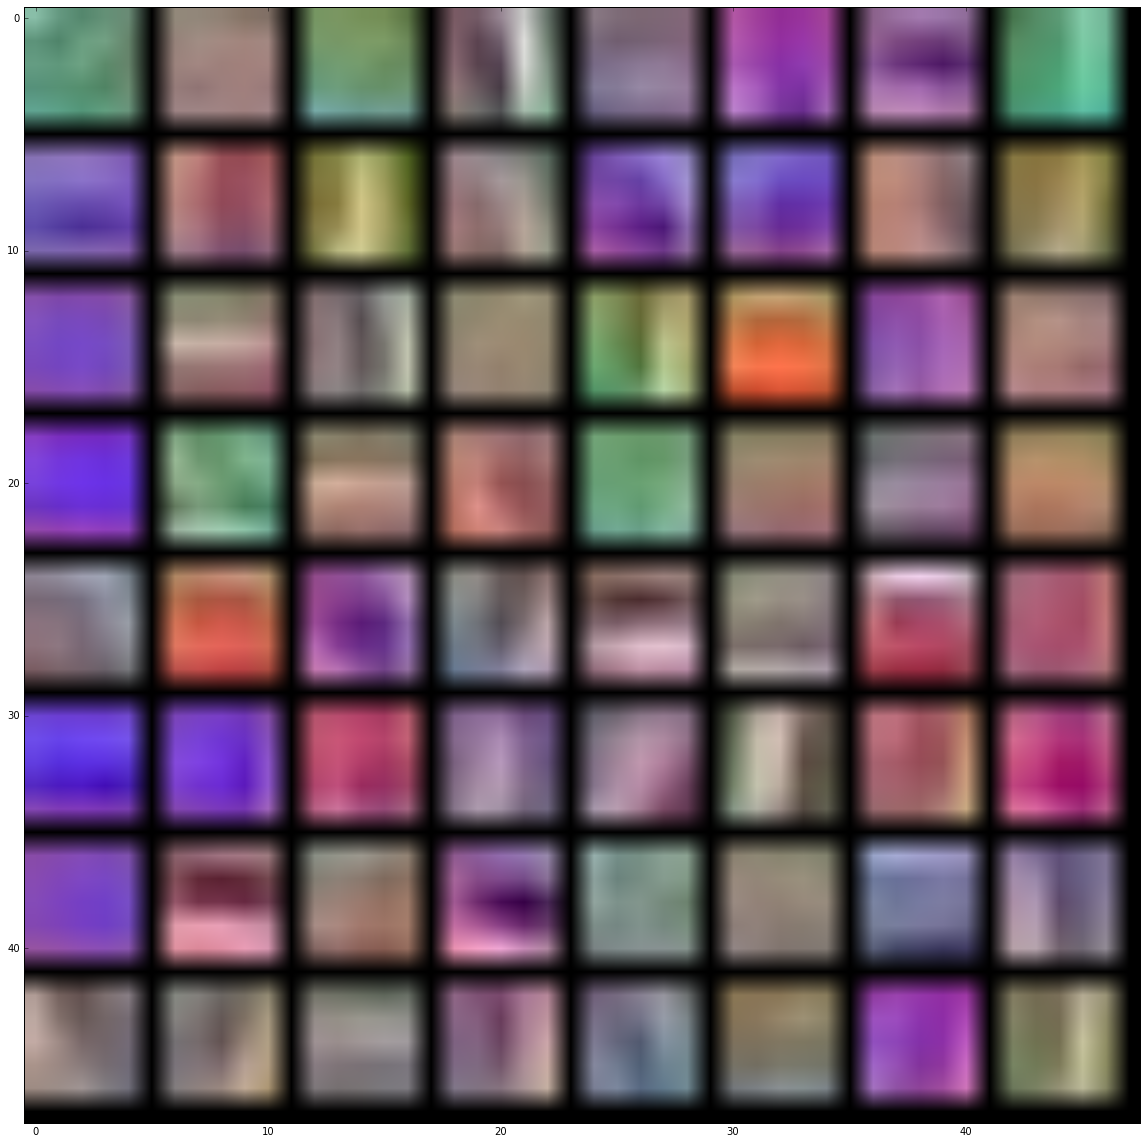

In [9]:
# take an array of shape (n, height, width) or (n, height, width, channels)
# and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)
def vis_square(data, padsize=1, padval=0):
    data -= data.min()
    data /= data.max()
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, padsize), (0, padsize)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant', constant_values=(padval, padval))
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data)

    # the parameters are a list of [weights, biases]


plt.rcParams['figure.figsize'] = (25.0, 20.0)
filters = net.params['conv1'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

Now you are going to view the feature maps of the two input images after they have been processed by the first convolutional layer. Feel free to modify the feat variables so that you can take a closer look as some of the feature maps more closely. Notice the visual similarities and differences between the features maps of both of these images.

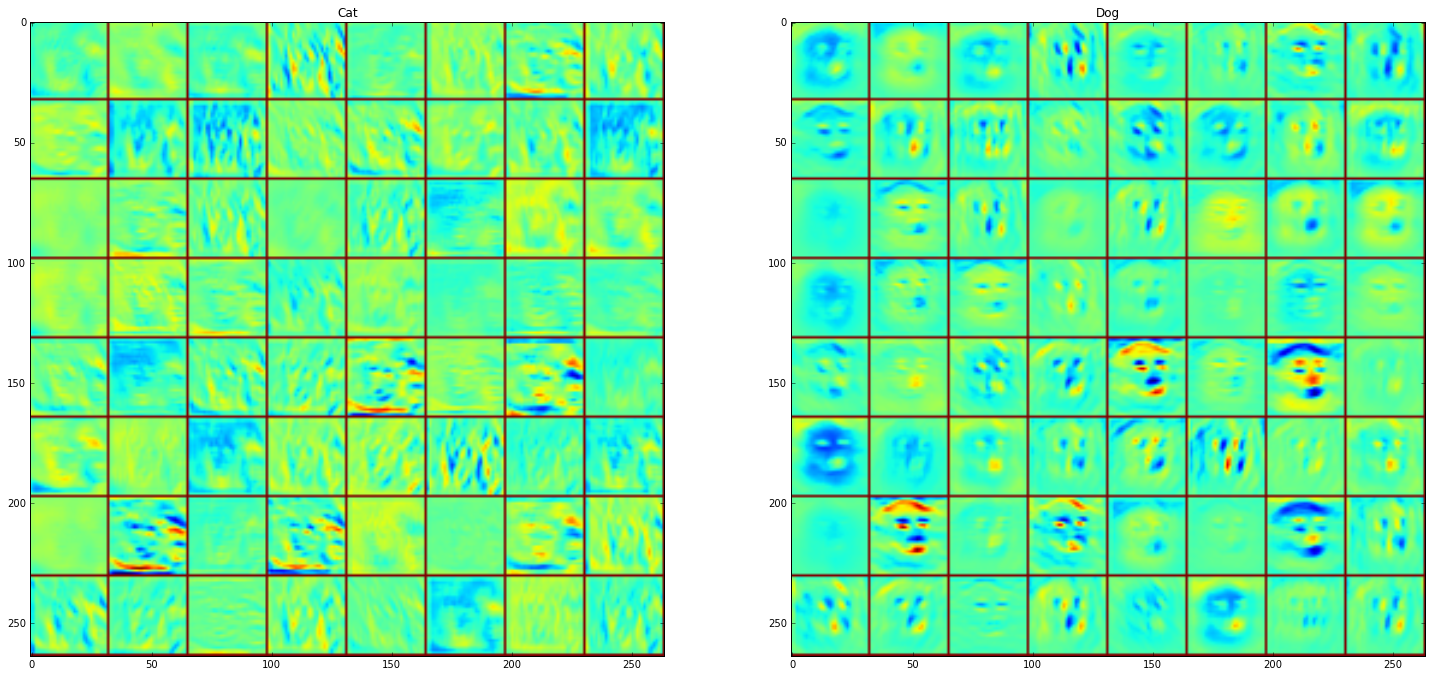

In [10]:
feat = net.blobs['conv1'].data[0,:64]
plt.subplot(1,2,1),plt.title('Cat')
vis_square(feat, padval=1)
net.blobs['conv1'].data.shape
feat2 = net2.blobs['conv1'].data[0, :64]
plt.subplot(1,2,2),plt.title('Dog')
vis_square(feat2, padval=1)

Now view the feature maps from the 2nd convolutional layer.

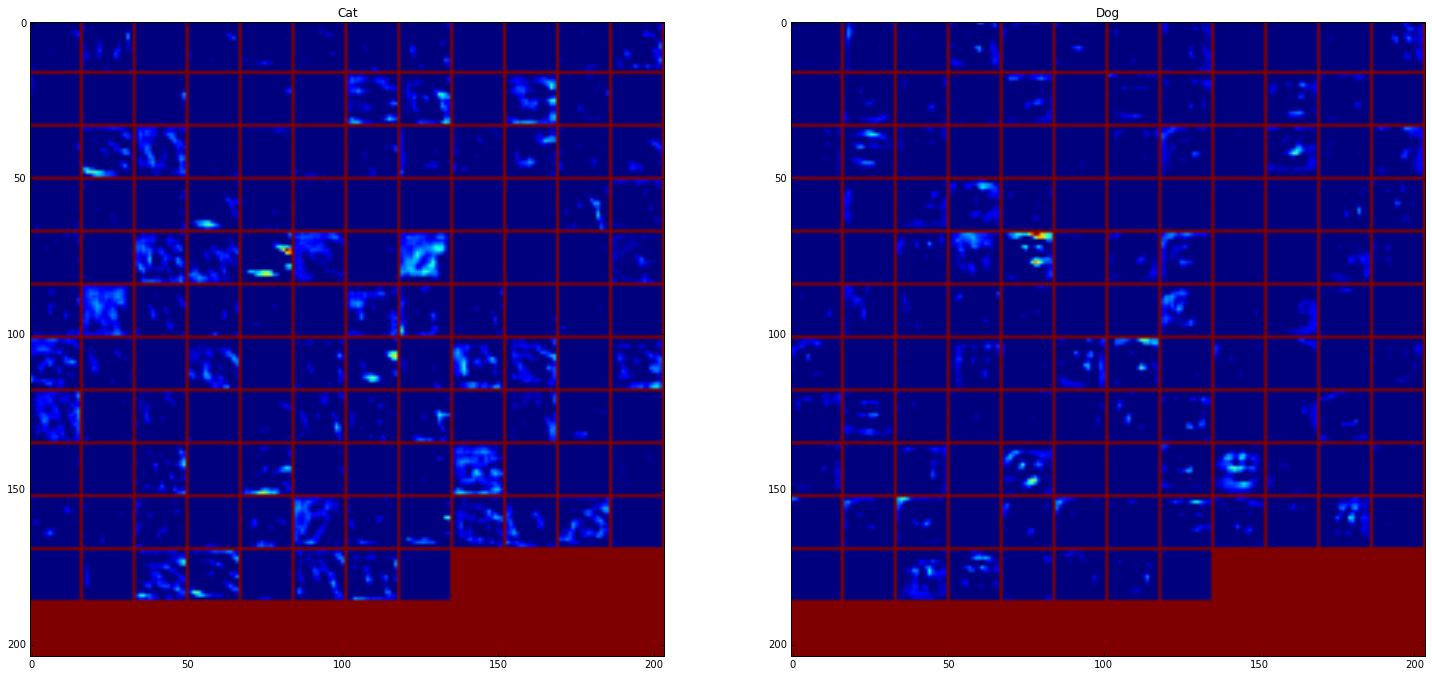

In [19]:
feat = net.blobs['conv2'].data[0]
plt.subplot(1,2,1),plt.title('Cat')
vis_square(feat, padval=1)
feat2 = net2.blobs['conv2'].data[0]
plt.subplot(1,2,2),plt.title('Dog')
vis_square(feat2, padval=1)

Now view the feature map of the last convolutional layer and then the pooled version.

In [ ]:
feat = net.blobs['conv3'].data[0]
plt.subplot(1,2,1),plt.title('Cat')
vis_square(feat, padval=0.5)
feat2 = net2.blobs['conv3'].data[0]
plt.subplot(1,2,2),plt.title('Dog')
vis_square(feat2, padval=0.5)

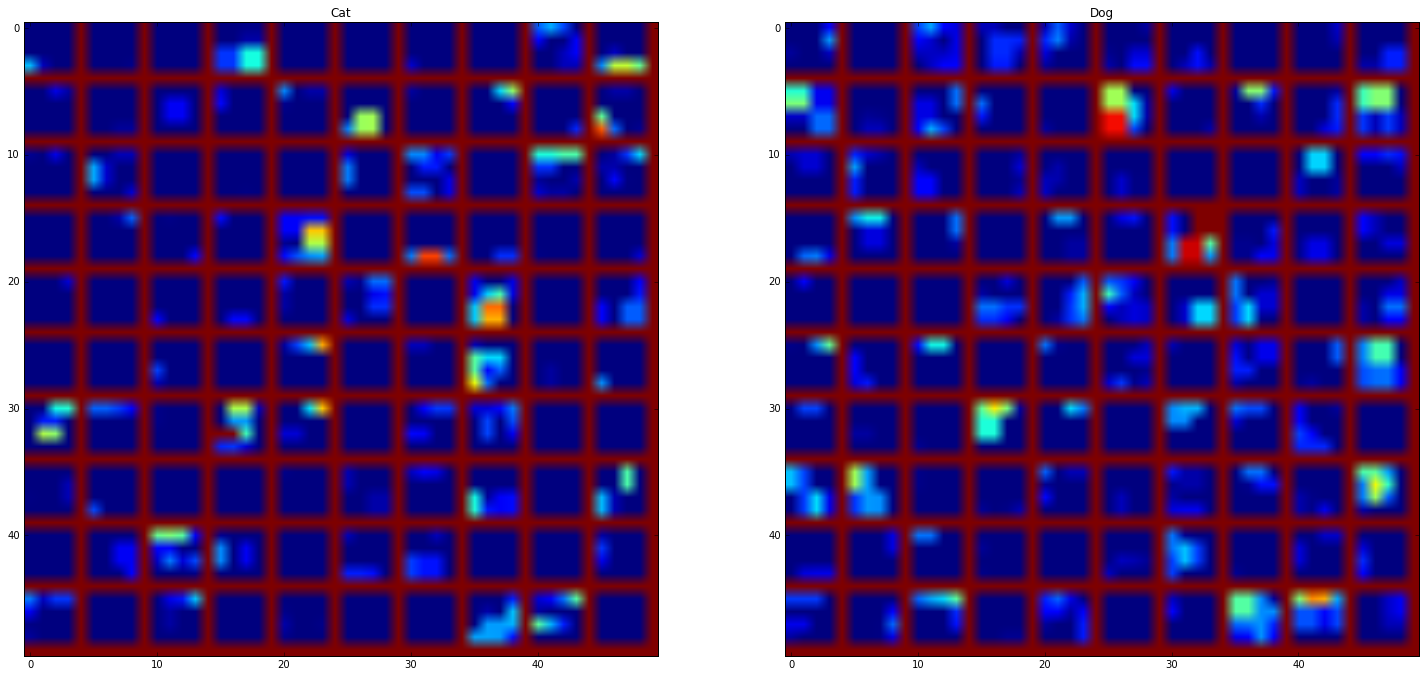

In [21]:
feat = net.blobs['pool3'].data[0,:100]
plt.subplot(1,2,1),plt.title('Cat')
vis_square(feat, padval=1)
feat2 = net2.blobs['pool3'].data[0,:100]
plt.subplot(1,2,2),plt.title('Dog')
vis_square(feat2, padval=1)

Now view the neuron activations for the fully-connected layer ip2. You will notice that the neurons being activated by the two input images are very different. This is good as it means the network is effectively differentiating the two images at the higher layers in the network.

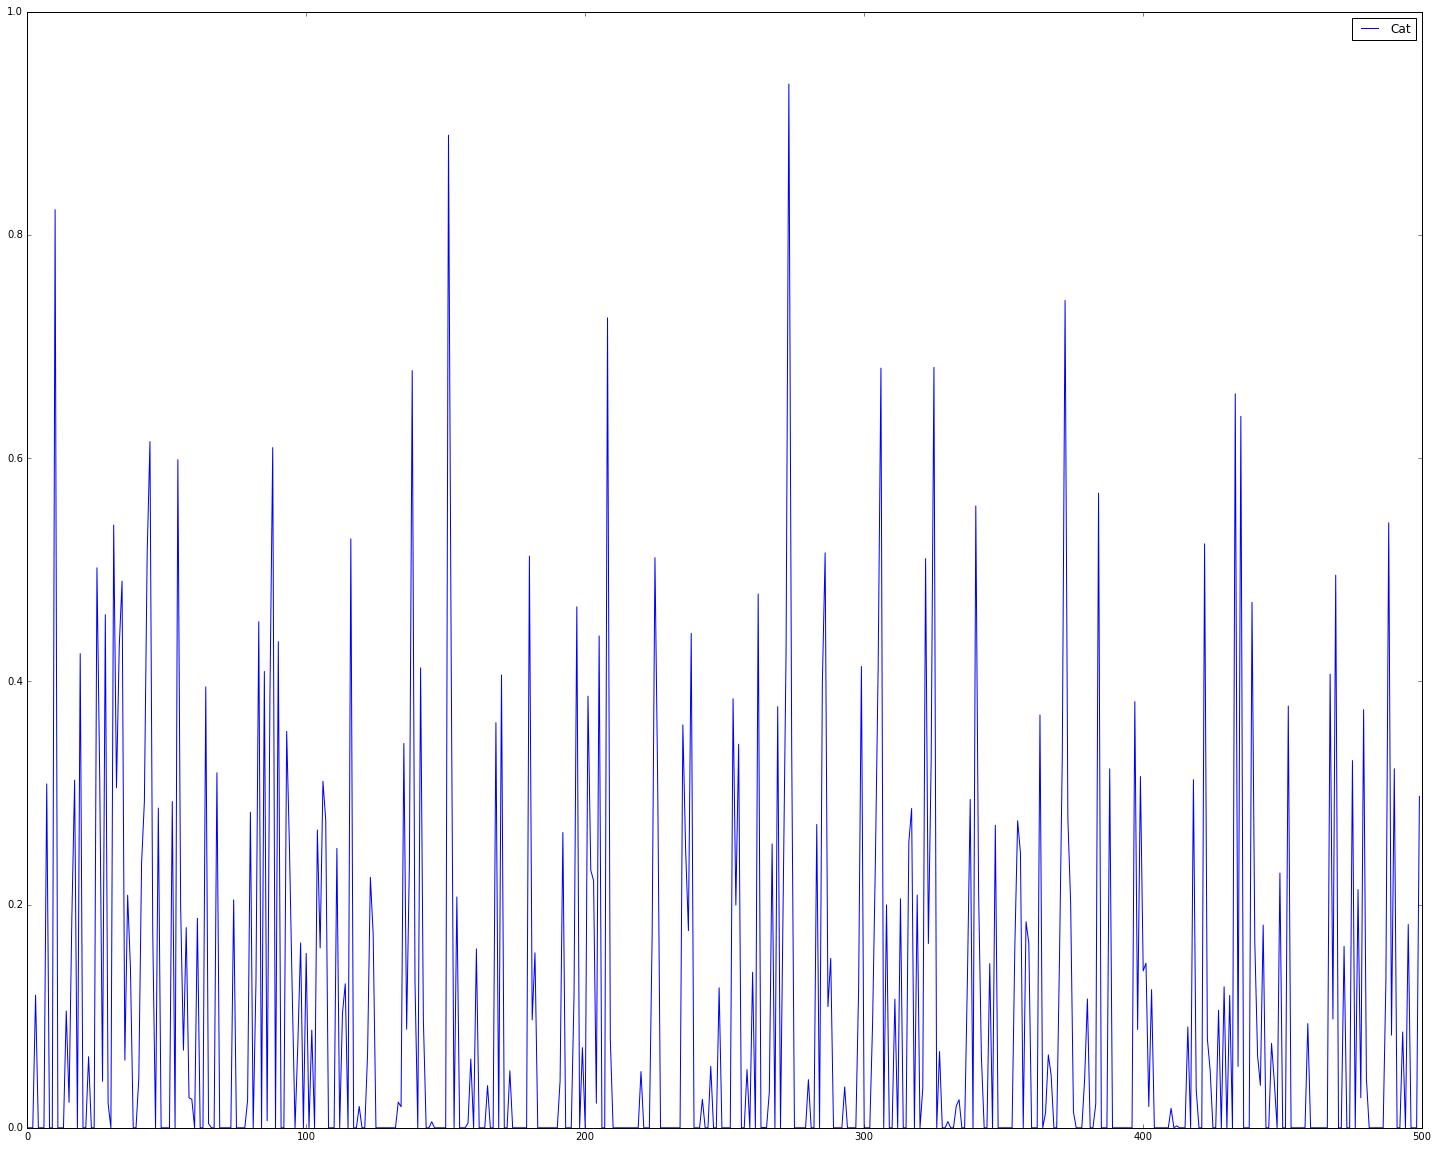

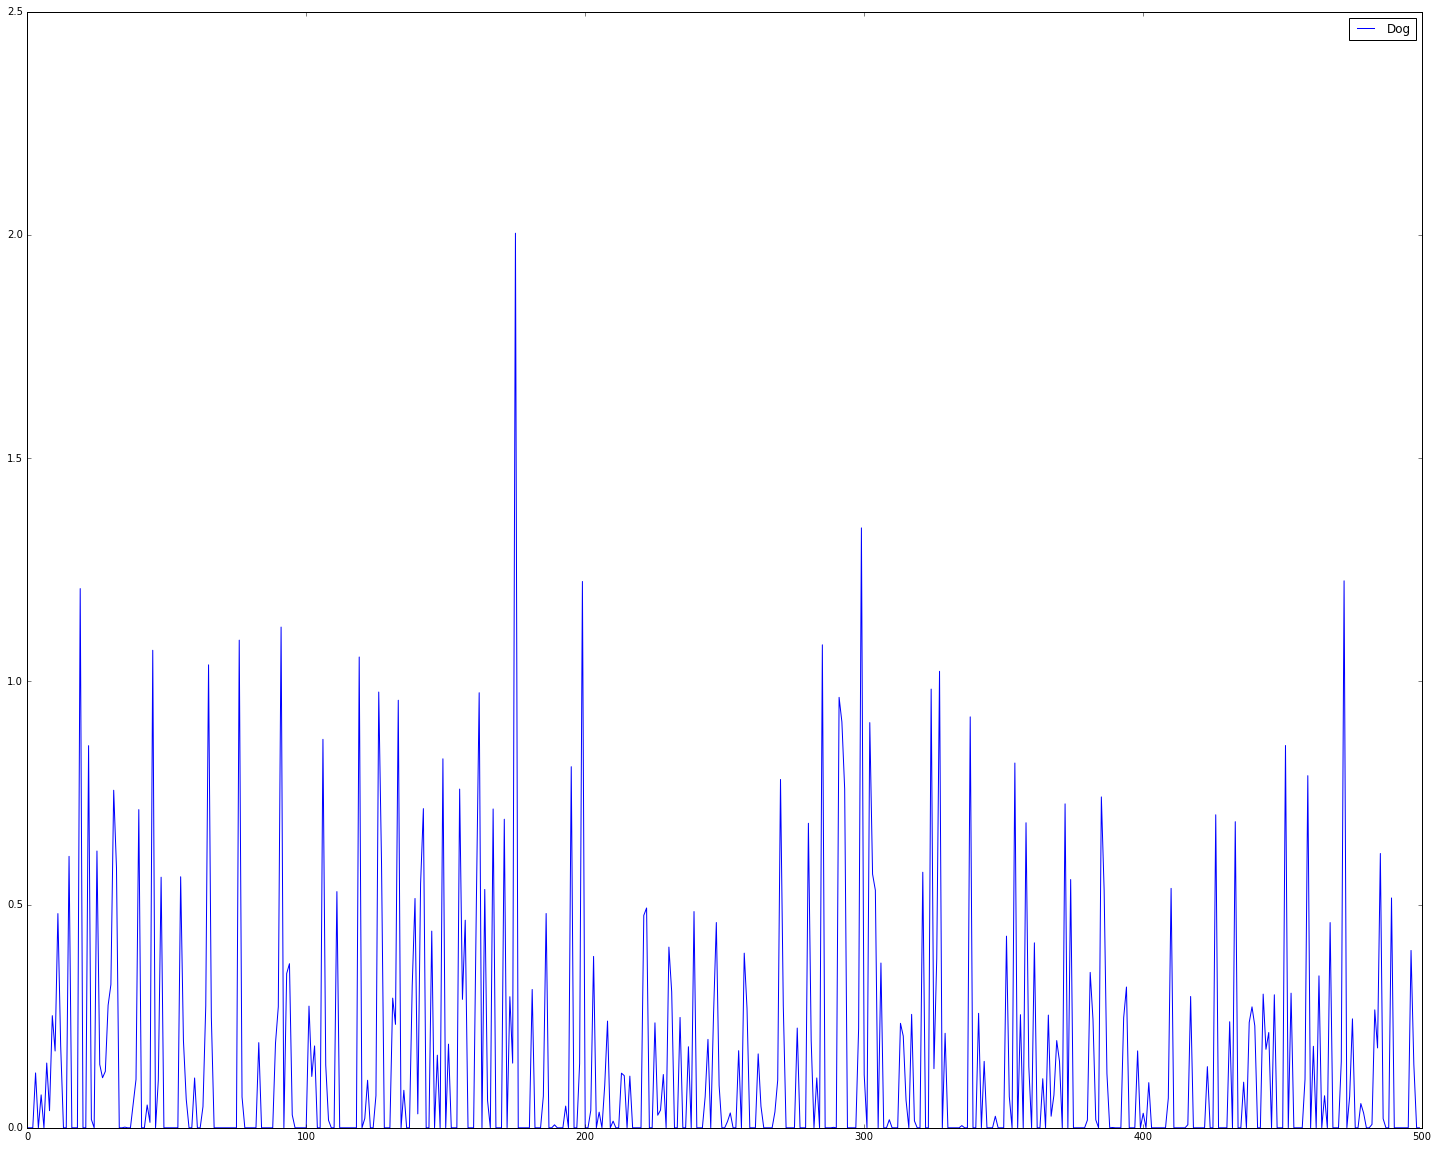

In [11]:
feat = net.blobs['ip2'].data[0]
plt.plot(feat.flat,label='Cat')
plt.legend()
plt.show()
##########################################################################################################################
# Plot ip2 for the input image of the Dog image. Compare the Differences 
feat2 = net2.blobs['ip2'].data[0]
plt.plot(feat2.flat, label='Dog')
plt.legend()

## Reflection

In this project, we covered core concepts of deep learning and convolutional neural networks. We also learned how to build convolutional neural networks using Caffe and Python from scratch. 

Understanding ConvNets and learning to use them for the first time can sometimes be an intimidating experience. Caffe isn't like scikitlearn: it hasn't been designed so it easily predict using model.fit(X, y) or model.predict(Z) and get a useful result. Caffe and Convolutional Neural Network requires lot of reading and the tutorials are all expected that you've got the background to fill in the gaps.

Installation of Caffe is also a challenge since it is required to download the source code and compile the code on a Linux machine. Caffe has several dependencies like CUDA for GPU mode that needs to be installed if you are planning to use GPU. In short, it is a big hassle to install Caffe, and my recommendation is don't even try it to install it on your Windows laptop.

Instead, get a AWS instance with GPU support and start with an AMI that has already installed all the required software for you.
We have only scratch the surface on convolutional neural networks with this project. The field is moving very fast and new and interesting architectures and techniques are been discussed and used all the time. Because of the success of CNNs in the field of image classification, in many different areas where convolutional neural networks are applied to solve ultra-complex problems, often the input data first is translated to image data.

As I moved through all the challenges of this project, I found Deep Learning and specially Convolutional Neural Networks are very interesting and there are lots of applications like Image recognition, Video analysis, Natural language processing, Drug discovery, and Playing Go!



## Improvement

My Goal in this project was to create Convolutional Neural Network from scratch, however, lots of researchers and engineers have made Caffe models for different tasks with all kinds of architectures and data. These models are learned and applied for problems ranging from simple regression, to large-scale visual classification, to Siamese networks for image similarity, to speech and robotics applications.

To improve the classification accuracy, we might increase network size or use one of the Caffe's predefined models from [Caffe Model Zoo](http://caffe.berkeleyvision.org/model_zoo.html), change activation functions, modify training algorithm, and do data augmentation.


## References

1. [Caffe - Deep learning framework by the BVLC](http://caffe.berkeleyvision.org/)
2. [Wikipedia - Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network)
3. [An Intuitive Explanation of Convolutional Neural Networks](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/)
4. [Deep Learning in a Nutshell: Core Concepts](https://devblogs.nvidia.com/parallelforall/deep-learning-nutshell-core-concepts/)
5. [Start deep learning with Jupyter notebooks in the cloud](http://efavdb.com/deep-learning-with-jupyter-on-aws/)
6. [Udacity Deep Learning - Take machine learning to the next level](https://www.udacity.com/course/deep-learning--ud730)
7. [Installation Guide - Caffe and Anaconda on AWS EC2](https://github.com/adilmoujahid/deeplearning-cats-dogs-tutorial/blob/master/aws-ec2-setup.md)
8. [CS231n Convolutional Neural Networks for Visual Recognition](http://cs231n.github.io/neural-networks-3/)
